# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
Request = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
Request

<Response [200]>

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(Request.content)

In [5]:
df2 = pd.read_csv('image_predictions.tsv', sep = '\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
with open('tweet-json.txt', 'r') as file:
    tweet_extracts = file.readlines()

tweepy_data = []
for tweet in tweet_extracts:
    tweet = json.loads(tweet)
    tweepy_data.append({'tweet_id': tweet['id'],
                            'retweet_count': tweet['retweet_count'],
                           'favorite_count': tweet['favorite_count']})

df3 = pd.DataFrame(tweepy_data)
df3.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [7]:
#the data extracted with API
ha = json.loads(tweet_extracts[0])
ha.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [8]:
#save df to csv for assessment purpose
df3.to_csv('additional_data_from_tweepy.csv', index= False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
#visual assessment
df1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
884,760190180481531904,NaN,NaN,2016-08-01 19:07:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None
17,888804989199671297,NaN,NaN,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888804989...,13,10,Zeke,None,None,None,None
2188,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeremy. He hasn't grown into his skin ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677...,11,10,Jeremy,None,None,None,None
1505,691793053716221953,NaN,NaN,2016-01-26 01:21:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We usually don't rate penguins but this one is...,NaN,NaN,NaN,https://vine.co/v/OTTVAKw6YlW,10,10,None,None,None,None,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cannon. He just heard something behind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175...,12,10,Cannon,None,None,None,None


My eyes were quick to catch the missing data in the `df1`. This data completeness issue has to be fixed! Also, during visual assesssment, I spotted a row with incorrect rating.

In [10]:
display(df1.query('tweet_id == 883482846933004288'))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None


In [11]:
#visual assessment
df2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1065,715680795826982913,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,0.001197,True
757,688547210804498433,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1,papillon,0.531279,True,Blenheim_spaniel,0.214197,True,Border_collie,0.053840,True
113,667915453470232577,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,1,leatherback_turtle,0.452517,False,boxer,0.196655,True,terrapin,0.160983,False
845,695095422348574720,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,0.227784,True,Chihuahua,0.218128,True,Border_collie,0.093457,True
810,692187005137076224,https://pbs.twimg.com/media/CZskaEIWIAUeTr5.jpg,2,Siberian_husky,0.810592,True,malamute,0.119745,True,Eskimo_dog,0.029265,True


In this `df2` dataframe, I visually spot some images here are not dog images. This information is unwanted, thus a tidiness problem.

In [12]:
df3.sample(5)

,favorite_count,retweet_count,tweet_id
1809,1957,741,676819651066732545
2303,857,584,666837028449972224
1366,3134,1091,702539513671897089
97,7467,1667,873213775632977920
2219,491,162,668480044826800133


In [13]:
#programmatic assessment
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [16]:
df1[df1.text.str.match(r'RT @')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


Here are the unwanted retweets to take off the data

In [17]:
df1.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


It is expected that the ranking denominator is 10 for all, however some observations were found to have denominators other than 10. To check and correct this.

In [18]:
df1.iloc[22][['text', 'name']]

text    I've yet to rate a Venezuelan Hover Wiener. Th...
name                                                 such
Name: 22, dtype: object

For wrong name `such`.

In [19]:
df1[df1.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


Replies are also unwanted!

In [20]:
columns = pd.Series(list(df1) + list(df2) + list(df3))
columns[columns.duplicated()]

17    tweet_id
31    tweet_id
dtype: object

### Quality issues
#### df1
1. Missing data in columns: `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp` (Visual)

2. Incorrect rateing; for instance `Bella (tweet_id = 883482846933004288)` has 5 rating instead of 13.5 (Visual)

3. Wrong datatype: IDs should be string objects:: `tweet_id` should be str (also in `df2` and `df3` dataframes) 

4. Wrong datatype:: `timestep` should be datetime object

5. Wrong datatype:: `rating` should be float not int

6. Remove retweet data

7. Records with incorrect rating_denominators (!= 10)

8. Missing `expanded_urls`

9. Remove reply data


### Tidiness issues
***df2***
1. Drop information which are unrelated to dogs

***df1***
2. Data Type is not treated a feature; the pupper, doggo, floofer, puppo should be collapsed into a column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()

### Issue #1: Wrong datatype: IDs should be string objects:: tweet_id should be str (also in df2 and df3 dataframes)


#### Define:  Convert the values to strings using `.astype`

#### Code

In [22]:
df1_copy.tweet_id = df1_copy.tweet_id.astype('str')
df2_copy.tweet_id = df2_copy.tweet_id.astype('str')
df3_copy.tweet_id = df3_copy.tweet_id.astype('str')

#### Test

In [23]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [24]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [25]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Issue #2: Wrong datatype:: timestamp should be datetime object


#### Define Use `pd.to_datetime` to convert to datetime object

#### Code

In [26]:
df1_copy.timestamp = pd.to_datetime(df1_copy.timestamp)

#### Test

In [27]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3: Remove reply data

#### Define Use `.isna()` to mask out the reply observations. Test with `.notna()` to ensure the data is free of reply observations

#### Code

In [28]:
print(df1_copy.shape)
df1_copy = df1_copy[df1_copy.in_reply_to_status_id.isna()]

(2356, 17)


#### Test

In [29]:
df1_copy.shape

(2278, 17)

In [30]:
df1_copy.in_reply_to_status_id.notna().sum()

0


### Issue #4: Remove retweet data

#### Define Use `.isna()` to mask out the retweet observations. Test with `.notna()` to ensure the data is free of retweet observations

#### Code

In [31]:
print(df1_copy.shape)
df1_copy = df1_copy[df1_copy.retweeted_status_id.isna()]

(2278, 17)


#### Test

In [32]:
print(df1_copy.shape)
df1_copy.retweeted_status_timestamp.notna().sum()

(2097, 17)


0

In [33]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

### Issue #5: Missing data in columns: `in_reply_to_status_id` , `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and  `retweeted_status_timestamp` 

#### Define: use `.drop`  to delete the empty columns `in_reply_to_status_id` , `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and  `retweeted_status_timestamp` 

#### Code

In [34]:
df1_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                         'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],
             inplace = True)

#### Test

In [35]:
df1_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #6: Incorrect rating numerator; for instance Bella (tweet_id = 883482846933004288) has 5 rating instead of 13.5 (Visual)

#### Define: This singular case of incorrect rating makes me question if there are more incorrect ratings in the dataframe. For this case, I would extract ratings for all observations using `text.str.extract(r'(\d+\.?\d*/\d+)')`, the regex here captures decimal ratings

#### Code

In [36]:
df1_copy.query('tweet_id == "883482846933004288"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None


In [37]:
df1_copy[['rating_numerator', 'rating_denominator']] = df1_copy.text.str.extract(r'(\d+\.?\d*/\d+)').iloc[:,0].str.split('/', expand = True)

#### Test

In [38]:
df1_copy.query('tweet_id == "883482846933004288"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None


### Issue #7: Records with incorrect rating_denominators (!= 10)

#### Define: Use query to get observations with rating denominators not equal to 10, then inspect the tweet to confirm these were inconsistensies. After inspection, I discovered that the inconsistent ratings those observations with rating not being multiples of 10.

#### Code

In [39]:
df1_copy.query('rating_denominator != "10"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [40]:
#inspecting one of the samples
df1_copy.loc[902, 'expanded_urls']

'https://twitter.com/dog_rates/status/758467244762497024/video/1'

By Inspection, I observed that the ratings ain't only for one dog, so are for a group of dogs. It is therefore consistent to have a rating denominator in the multiple of 10. What is therefore incorrect is the rating denominators such as 7, 11 etc

In [41]:
df1_copy[~df1_copy.rating_denominator.str.match(r'([1-9]+0)')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


Since there are just 4 cases of inconsistent ratings wach of which is unique, I would treat the cases individually.

In [42]:
#inspecting one of the samples
for index in [516, 1068, 1662, 2335]:
    print(index)
    print({df1_copy.loc[index, 'text']})

516
{'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'}
1068
{'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'}
1662
{'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'}
2335
{'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'}


In [43]:
#input the right ratings
df1_copy.loc[1068, ['rating_numerator', 'rating_denominator']] = '14', '10'
df1_copy.loc[1662, ['rating_numerator', 'rating_denominator']] = '10', '10'
df1_copy.loc[2335, ['rating_numerator', 'rating_denominator']] = '9', '10'
#drop observation with no rating
df1_copy.drop(index = 516, inplace= True)

#### Test

In [44]:
df1_copy[~df1_copy.rating_denominator.str.match(r'([1-9]+0)')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #8: Wrong datatype:: ratings (denominator and numerator) should be float not int

#### Define: use `.astype(float)` on the `rating_numerator` and `rating_denominator` columns.

#### Code

In [45]:
df1_copy.rating_numerator = df1_copy.rating_numerator.astype('float')
df1_copy.rating_denominator = df1_copy.rating_denominator.astype('float')

In [46]:
df1_copy.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
157,861288531465048066,2017-05-07 18:36:02,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13.0,10.0,None,None,None,None,None


#### Test

In [47]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 212.9+ KB


### Issue #9: Missing `expanded_urls`

#### Define: use `isnull()` to identify the observations with missing `expanded_urls`. Then input the urls using `loc[ ]` and `tweet_id`.

#### Code

In [48]:
df1_copy[df1_copy.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,2017-02-05 21:56:51,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,12.0,10.0,None,None,None,None,None
707,785515384317313025,2016-10-10 16:20:36,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,10.0,10.0,None,None,None,None,None
1445,696518437233913856,2016-02-08 02:18:30,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,10.0,10.0,None,None,None,pupper,None


In [49]:
df1_copy.loc[[375, 707, 1445],'expanded_urls'] = [f'https://twitter.com/dog_rates/status/{i}' for i in df1_copy[df1_copy.expanded_urls.isnull()].tweet_id]

In [50]:
df1_copy.loc[375, 'expanded_urls']

'https://twitter.com/dog_rates/status/828361771580813312'

#### Test

In [51]:
df1_copy[df1_copy.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [52]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2096 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 292.9+ KB


### Issue #10: Drop information which are unrelated to dogs in `df2` dataframe

#### Define: Since the `df1` dataframe contains dog rating tweet. One can take advantage of this by `pd.merge` the dataframe `df2` to it, knowing the non-dog observations would be dropped.

#### Code

In [53]:
df4 = pd.merge(df1_copy, df2_copy[['tweet_id', 'jpg_url', 'img_num']], how = 'left', on = 'tweet_id')
df4.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0


#### Test

In [54]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 14 columns):
tweet_id              2096 non-null object
timestamp             2096 non-null datetime64[ns]
source                2096 non-null object
text                  2096 non-null object
expanded_urls         2096 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null float64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
jpg_url               1970 non-null object
img_num               1970 non-null float64
dtypes: datetime64[ns](1), float64(3), object(10)
memory usage: 245.6+ KB


In [55]:
df4.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num
1210,697270446429966336,2016-02-10 04:06:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,https://twitter.com/dog_rates/status/697270446...,10.0,10.0,Bentley,None,None,None,None,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1.0
847,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10.0,just,doggo,None,pupper,None,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1.0
258,833479644947025920,2017-02-20 00:53:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Poppy. She just arrived. 13/10 would s...,https://twitter.com/dog_rates/status/833479644...,13.0,10.0,Poppy,None,None,None,None,https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg,3.0
868,738184450748633089,2016-06-02 01:44:22,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",https://twitter.com/dog_rates/status/738184450...,9.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1.0
1215,696894894812565505,2016-02-09 03:14:25,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,https://twitter.com/dog_rates/status/696894894...,9.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1.0


### Issue #11: Data Type is not treated a feature; the pupper, doggo, floofer, puppo should be collapsed into a column.

#### Define: Three steps to complete this task:
- Write a function to tag dog which are neither pupper, doggo, puppo nor puppo as `unknown`,
- `.apply()` the function on the dataframe along `axis = 1`,
- use `pd.melt` to separate the dog types and delete unwanted rows and column.

#### Code

In [56]:
def tag_unknown(obs):
    cond = (obs[8] == 'None') & (obs[9] == 'None') & (obs[10] == 'None') & (obs[11] == 'None')
    if cond:
        return 'unknown'
    else:
        return 'None'

df4['unknown'] = df4.apply(tag_unknown, axis = 1)
df4.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,unknown
12,889665388333682689,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,None,None,None,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1.0,None
1899,669625907762618368,2015-11-25 21:17:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's having fun AND being safe...,https://twitter.com/dog_rates/status/669625907...,12.0,10.0,Penny,None,None,None,None,https://pbs.twimg.com/media/CUr9NjgU8AEpf5w.jpg,1.0,unknown
273,831552930092285952,2017-02-14 17:17:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Dutch. He dressed up as his favorite e...,https://twitter.com/dog_rates/status/831552930...,13.0,10.0,Dutch,None,None,None,None,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1.0,unknown
775,749075273010798592,2016-07-02 03:00:36,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Boomer. He's self-baptizing. Other dog...,https://vine.co/v/5ztZvHgI17r,11.0,10.0,Boomer,doggo,None,None,None,NaN,NaN,None
1181,699323444782047232,2016-02-15 20:04:36,"<a href=""http://twitter.com/download/iphone"" r...","""I'm bathing the children what do you want?"" ...",https://twitter.com/dog_rates/status/699323444...,10.0,10.0,None,None,None,None,None,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1.0,unknown


In [57]:
df5 = pd.melt(df4, id_vars= ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator',
                       'rating_denominator','name','jpg_url','img_num'], var_name = 'dog_type_tag', value_name = 'dog_type')
df5 = df5[df5.dog_type != "None"]
df5.drop('dog_type_tag', axis = 1, inplace = True)
df5.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_type
8898,789268448748703744,2016-10-21 00:53:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Stella. She's happier than I will ever...,https://twitter.com/dog_rates/status/789268448...,10.0,10.0,Stella,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1.0,unknown
9835,681339448655802368,2015-12-28 05:02:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Asher. He's not wearing a seatbelt or ...,https://twitter.com/dog_rates/status/681339448...,9.0,10.0,Asher,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1.0,unknown
4625,803638050916102144,2016-11-29 16:33:36,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,https://twitter.com/dog_rates/status/803638050...,13.0,10.0,None,https://pbs.twimg.com/ext_tw_video_thumb/80363...,1.0,pupper
9281,732732193018155009,2016-05-18 00:39:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,https://twitter.com/dog_rates/status/732732193...,12.0,10.0,Ralpher,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1.0,unknown
9983,675888385639251968,2015-12-13 04:02:03,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,https://twitter.com/dog_rates/status/675888385...,10.0,10.0,None,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1.0,unknown


#### Test

In [58]:
df5.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_type
9663,691444869282295808,2016-01-25 02:17:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She likes flowers. 12/10 https...,https://twitter.com/dog_rates/status/691444869...,12.0,10.0,Bailey,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2.0,unknown
8498,866686824827068416,2017-05-22 16:06:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,https://twitter.com/dog_rates/status/866686824...,12.0,10.0,Lili,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1.0,unknown
199,845397057150107648,2017-03-24 22:08:59,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13.0,10.0,Mimosa,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1.0,doggo
9171,748324050481647620,2016-06-30 01:15:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,https://twitter.com/dog_rates/status/748324050...,11.0,10.0,Duke,https://pbs.twimg.com/media/CmKUwImXIAA58f5.jpg,1.0,unknown
10139,672264251789176834,2015-12-03 04:01:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,https://twitter.com/dog_rates/status/672264251...,10.0,10.0,Kreg,https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg,1.0,unknown
9431,709852847387627521,2016-03-15 21:24:41,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,https://twitter.com/dog_rates/status/709852847...,12.0,10.0,None,https://pbs.twimg.com/media/CdnnZhhWAAEAoUc.jpg,2.0,unknown
10253,670385711116361728,2015-11-27 23:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,https://twitter.com/dog_rates/status/670385711...,8.0,10.0,Larry,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1.0,unknown
10343,668537837512433665,2015-11-22 21:13:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,https://twitter.com/dog_rates/status/668537837...,8.0,10.0,Spark,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,1.0,unknown
9910,678410210315247616,2015-12-20 03:02:53,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jerome. He can shoot french fries...,https://twitter.com/dog_rates/status/678410210...,10.0,10.0,Jerome,https://pbs.twimg.com/media/CWoyfMiWUAAmGdd.jpg,1.0,unknown
5033,742150209887731712,2016-06-13 00:22:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Edmund. He sends stellar selfies. Cute...,https://twitter.com/dog_rates/status/742150209...,8.0,10.0,Edmund,https://pbs.twimg.com/media/CkylrVWWsAAiXJE.jpg,1.0,pupper


## Merge additional information (number of retweets and likes) from df3

In [59]:
df_all = pd.merge(df5, df3_copy, on = 'tweet_id', how = 'left')

In [60]:
df_all.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_type,favorite_count,retweet_count
986,748699167502000129,2016-07-01 02:06:06,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,https://twitter.com/dog_rates/status/748699167...,11.0,10.0,Tripp,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,1.0,unknown,5213,1814
401,879050749262655488,2017-06-25 18:56:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,https://twitter.com/dog_rates/status/879050749...,11.0,10.0,Steven,https://pbs.twimg.com/media/DDMD_phXoAQ1qf0.jpg,1.0,unknown,23022,4941
730,796125600683540480,2016-11-08 23:01:49,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,https://twitter.com/king5seattle/status/796123...,13.0,10.0,None,NaN,NaN,unknown,5511,2079
1880,670385711116361728,2015-11-27 23:36:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Larry. He's a Panoramic Benzoate. Can sho...,https://twitter.com/dog_rates/status/670385711...,8.0,10.0,Larry,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1.0,unknown,593,234
1652,675534494439489536,2015-12-12 04:35:48,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,https://twitter.com/dog_rates/status/675534494...,11.0,10.0,a,https://pbs.twimg.com/media/CV_7CV6XIAEV05u.jpg,1.0,unknown,1953,470


In [61]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2107 entries, 0 to 2106
Data columns (total 13 columns):
tweet_id              2107 non-null object
timestamp             2107 non-null datetime64[ns]
source                2107 non-null object
text                  2107 non-null object
expanded_urls         2107 non-null object
rating_numerator      2107 non-null float64
rating_denominator    2107 non-null float64
name                  2107 non-null object
jpg_url               1980 non-null object
img_num               1980 non-null float64
dog_type              2107 non-null object
favorite_count        2107 non-null int64
retweet_count         2107 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 230.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

# df_all.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which dog type has the highest rating?

2. Does the dog type influence the followers interactions (retweets and likes)

3. What is the distribution of monthly activities (number of dog ratings done) of WeRateDogs?

### Insight 1: Which dog type has the highest rating?

Finding these averages requires care because as I have discovered earlier some ratings are for a group of dogs (more that 2). Just applying `mean()` fails to take this into account and it is better to compute the average with the formulae below:

$$\text{average rating} = \frac{\text{Total rating numerator}}{\text{Total rating denominator}} * 10$$

In [62]:
wrong_rating_df = df_all.groupby('dog_type')[['rating_numerator', 'rating_denominator']].mean()
wrong_rating_df

,rating_numerator,rating_denominator
dog_type,,
doggo,11.771084,10.000000
floofer,11.800000,10.000000
pupper,10.749000,10.000000
puppo,12.041667,10.000000
unknown,12.348585,10.539773


In [63]:
rating_df = df_all.groupby('dog_type')[['rating_numerator', 'rating_denominator']].sum()
rating_df['rating_average'] = rating_df['rating_numerator'] / rating_df['rating_denominator'] * 10
rating_df

,rating_numerator,rating_denominator,rating_average
dog_type,,,
doggo,977.00,830.0,11.771084
floofer,118.00,100.0,11.800000
pupper,2472.27,2300.0,10.749000
puppo,289.00,240.0,12.041667
unknown,21733.51,18550.0,11.716178


If care is not taken, one can rush to the conclusion that the dogs with unknown breed have highest average rating. However, this is false. The dog type: puppo has the highest average rating of over `12.04`.

### Insight 2: Does the dog type influence the followers interactions (retweets and likes)
Simply computing the mean with `.mean()` works here!

In [64]:
interaction_df = df_all.groupby('dog_type')[['retweet_count', 'favorite_count']].mean()
interaction_df['total_interaction'] = interaction_df.apply(sum, axis = 1)
interaction_df

,retweet_count,favorite_count,total_interaction
dog_type,,,
doggo,6466.433735,17820.228916,24286.662651
floofer,4083.600000,11674.900000,15758.500000
pupper,2554.634783,7460.482609,10015.117391
puppo,7124.875000,22715.125000,29840.000000
unknown,2660.214205,8607.311364,11267.525568


The `puppo` dog type is found to have attracted the highest followers interaction on the WeRateDogs twitter page. On the other hand, `pupper` have the least average interaction.

### Insight 3: What is the distribution of monthly activities (number of dog ratings done) of WeRateDogs?
We create the feature columns for year and month from the timestamp feature. Then count the activities (number of dog ratings done) by WeReateDogs.

In [65]:
df_all['year'] = df_all.timestamp.dt.year
df_all['month'] = df_all.timestamp.dt.month
df_all.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_type,favorite_count,retweet_count,year,month
29,819924195358416896,2017-01-13 15:08:56,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a doggo who has messed up. He was...,https://twitter.com/dog_rates/status/819924195...,11.0,10.0,None,https://pbs.twimg.com/ext_tw_video_thumb/81992...,1.0,doggo,14305,5607,2017,1
315,672898206762672129,2015-12-04 22:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,https://twitter.com/dog_rates/status/672898206...,11.0,10.0,Cheryl,https://pbs.twimg.com/media/CVadWcCXIAAL4Sh.jpg,1.0,pupper,944,459,2015,12
1029,743210557239623680,2016-06-15 22:36:19,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",https://twitter.com/dog_rates/status/743210557...,10.0,10.0,Kayla,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1.0,unknown,4215,1560,2016,6
706,803276597545603072,2016-11-28 16:37:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,https://twitter.com/dog_rates/status/803276597...,11.0,10.0,Winston,https://pbs.twimg.com/media/CyXPzXRWgAAvd1j.jpg,1.0,unknown,11207,2887,2016,11
1005,747103485104099331,2016-06-26 16:25:26,"<a href=""http://twitter.com/download/iphone"" r...","Guys... I said DOGS with ""shark qualities"" or ...",https://twitter.com/dog_rates/status/747103485...,11.0,10.0,None,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1.0,unknown,10534,4548,2016,6


In [66]:
count_df = df_all.groupby(['year', 'month'])['tweet_id'].count()
count_df

year  month
2015  11       296
      12       372
2016  1        183
      2        121
      3        132
      4         60
      5         60
      6         91
      7         98
      8         61
      9         70
      10        73
      11        55
      12        57
2017  1         70
      2         68
      3         52
      4         44
      5         43
      6         48
      7         51
      8          2
Name: tweet_id, dtype: int64

We observe a decline in the monthly activities of WeRateDogs. The brand started out rating about 300 dogs in their first month, and have an average of around 50 dog ratings in the last few months.

### Visualization

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

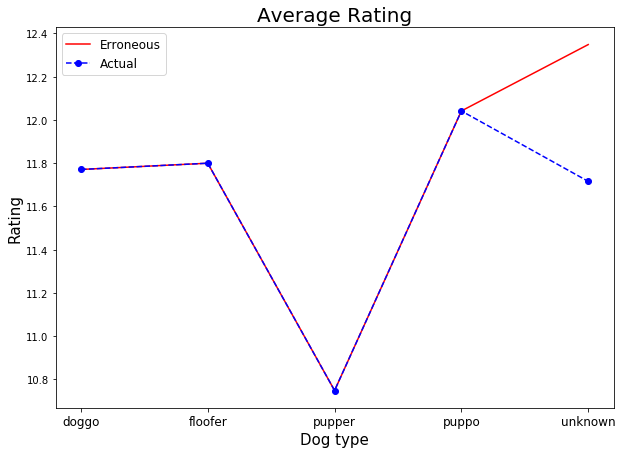

In [67]:
plt.figure(figsize= (10,7))
plt.plot(['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],wrong_rating_df.rating_numerator, 'r-', label = 'Erroneous')
plt.plot(['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],rating_df.rating_average, 'bo--', label = 'Actual')
plt.title('Average Rating', fontsize = 20)
plt.xlabel('Dog type', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.legend(fontsize = 12)
plt.xticks(fontsize=12)

Text(0.5,0,'Dog type')

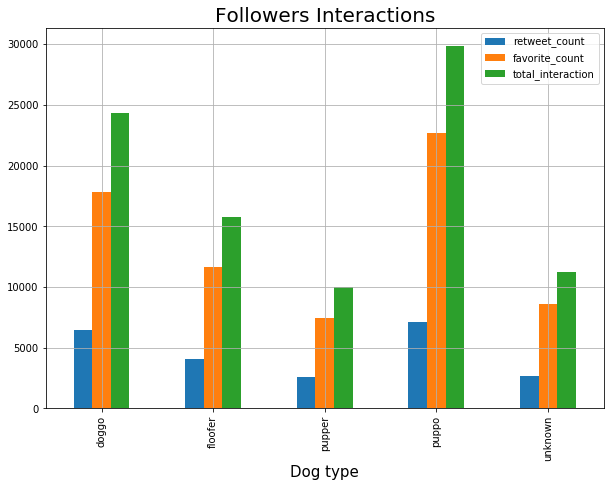

In [68]:
# plt.figure(figsize= (10,7))
interaction_df.plot.bar(figsize= (10,7));
plt.title('Followers Interactions', fontsize = 20)
plt.grid()
plt.xlabel('Dog type', fontsize = 15)

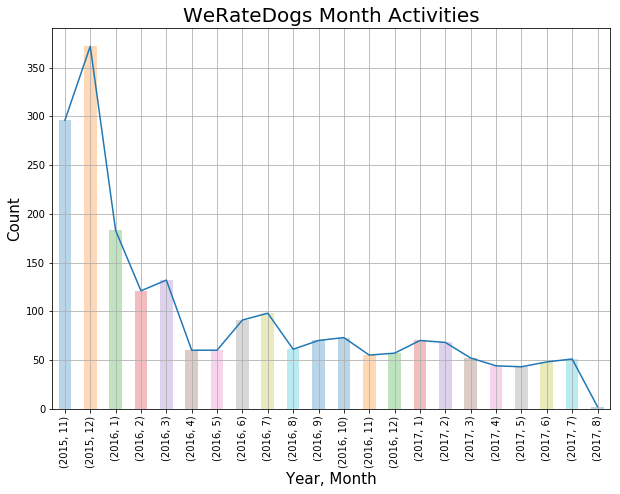

In [69]:
# plt.figure(figsize= (10,7))
count_df.plot.bar(figsize= (10,7), alpha = 0.3)
plt.plot(list(count_df))
plt.title('WeRateDogs Month Activities', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Year, Month', fontsize = 15)
plt.grid()

The months of peak performance are easy to spot with this barchart.